### Loading Libraries and Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [5]:
df = pd.read_csv('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
print(df['v2'].apply(lambda x: len(x.split( ' '))).sum())

86961


### Data Cleaning

In [11]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.rename(columns={'v1':'Class', 'v2': 'Text'}, inplace=True)
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['Class'] = df['Class'].map({'ham':0, 'spam':1})
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

### EDA

In [18]:
df['Class'].value_counts()

0    4825
1     747
Name: Class, dtype: int64

Text(0, 0.5, 'Number of ham and spam messages')

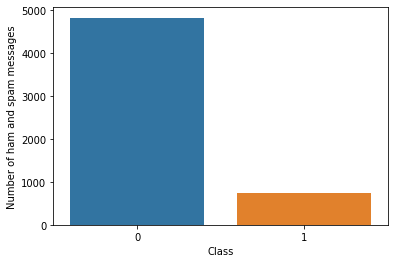

In [20]:
sns.countplot(x='Class', data=df)
plt.xlabel('Class')
plt.ylabel('Number of ham and spam messages')

In [21]:
df.describe()

,Class
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
df['length'] = df.Text.apply(len)
df.head()

,Class,Text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Text(0.5, 0, 'Message Length')

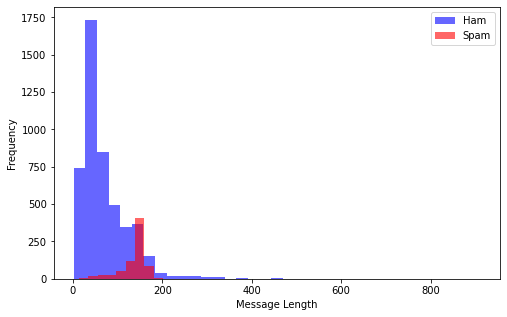

In [25]:
plt.figure(figsize=(8,5))
df[df.Class == 0].length.plot(bins=35, kind='hist', color='blue', label='Ham', alpha=0.6)
df[df.Class == 1].length.plot(kind='hist', color='red', label='Spam', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

### Pre-processing

In [31]:
stop_words = stopwords.words('english')
print(stop_words[::10])

porter = PorterStemmer()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [37]:
def clean_text(words):
    words = re.sub("[^a-zA-Z]", " ", words)
    text = words.lower().split()
    return " ".join(text)

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

def stemmer(stem_text):
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [38]:
df['Text'] = df['Text'].apply(clean_text)
df.head()

,Class,Text,length
0,0,go until jurong point crazi avail onli in bugi...,111
1,0,ok lar joke wif u oni,29
2,1,free entri in a wkli comp to win fa cup final ...,155
3,0,u dun say so earli hor u c alreadi then say,49
4,0,nah i don t think he goe to usf he live around...,61


In [39]:
df['Text'] = df['Text'].apply(remove_stopwords)
df['Text'] = df['Text'].apply(stemmer)

In [40]:
df.head()

,Class,Text,length
0,0,go jurong point crazi avail onli bugi n great ...,111
1,0,ok lar joke wif u oni,29
2,1,free entri wkli comp win fa cup final tkt st m...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61


In [41]:
print(df['Text'].apply(lambda x: len(x.split(' '))).sum())

51254


In [42]:
df.to_csv('df._clean.csv')

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Vectorization

In [47]:
X = df['Text']
y = df['Class']

In [48]:
vect = CountVectorizer(min_df = 5, ngram_range=(1,2)).fit(X)

In [49]:
X_vec = vect.transform(X)
len(vect.get_feature_names())

2260

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 2260)
(1115, 2260)
(4457,)
(1115,)


In [51]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [52]:
print(X_train_sm.shape)
print(y_train_sm.shape)

(7752, 2260)
(7752,)


## Model Building

#### Logistic Regression

In [59]:
model_lr = LogisticRegression()
model_lr.fit(X_train_sm, y_train_sm)
pred_y = model_lr.predict(X_test)

In [60]:
print('Accuracy is', model_lr.score(X_test, y_test))

Accuracy is 0.9264573991031391


In [66]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       949
           1       0.70      0.90      0.78       166

    accuracy                           0.93      1115
   macro avg       0.84      0.91      0.87      1115
weighted avg       0.94      0.93      0.93      1115



#### Naive Bytes

In [64]:
model_nb = MultinomialNB()

In [65]:
model_nb.fit(X_train_sm, y_train_sm)

MultinomialNB()

In [67]:
pred = model_nb.predict(X_test)

In [68]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(y_test, pred))

accuracy 0.9757847533632287
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       949
           1       0.94      0.90      0.92       166

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



#### Random Forest

In [73]:
model_rf = RandomForestClassifier(n_estimators=50)

In [74]:
model_rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(n_estimators=50)

In [75]:
preds = model_rf.predict(X_test)

In [76]:
print('accuracy %s' % accuracy_score(preds, y_test))
print(classification_report(y_test, preds))

accuracy 0.9103139013452914
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       949
           1       0.64      0.90      0.75       166

    accuracy                           0.91      1115
   macro avg       0.81      0.91      0.85      1115
weighted avg       0.93      0.91      0.92      1115



#### Support Vector Machine

In [77]:
model_svc = LinearSVC()

In [78]:
model_svc.fit(X_train_sm, y_train_sm)
predict = model_svc.predict(X_test)

In [81]:
print('accuracy %s' % accuracy_score(predict, y_test))
print(classification_report(y_test, predict))

accuracy 0.9192825112107623
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       949
           1       0.68      0.87      0.76       166

    accuracy                           0.92      1115
   macro avg       0.83      0.90      0.86      1115
weighted avg       0.93      0.92      0.92      1115



#### Best Model

In [82]:
log_acc = accuracy_score(pred_y, y_test)
nb_acc = accuracy_score(pred, y_test)
rf_acc = accuracy_score(preds, y_test)
svm_acc = accuracy_score(predict, y_test)

In [83]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM',],
                      'Score': [log_acc, nb_acc, rf_acc, svm_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,0.975785
0,Logistic Regression,0.926457
3,SVM,0.919283
2,Random Forest,0.910314
